# **Data Collection Notebook**

## Objectives

* Fetch data from Kaggle and save it as raw data.
* Inspect the data and save it under outputs/datasets/collection

## Inputs

*   Kaggle JSON file - the authentication token.

## Outputs

* Generate Dataset: outputs/datasets/collection/LoanDefaultDataset.csv


---

# Change working directory

We need to change the working directory from its current folder, where the notebook is stored, to its parent folder
* First we access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\kathr\\Nextcloud\\Dokumente\\Karriere\\Projekte\\vscode-projects\\PP5\\LoanGuard\\jupyter_notebooks'

* Then we want to make the parent of the current directory the new current directory
    * os.path.dirname() gets the parent directory
    * os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
current_dir = os.getcwd()
print(f"You set a new current directory: {current_dir}")

You set a new current directory: c:\Users\kathr\Nextcloud\Dokumente\Karriere\Projekte\vscode-projects\PP5\LoanGuard


---

# Fetch data from Kaggle

Install Kaggle package to fetch data

In [3]:
#%pip install kaggle==1.7.4.5

In order to authenticate Kaggle to download data in this session, your **authentication token (JSON file)** from Kaggle needs to be stored in the main project repository.
* In case you don't have your token yet, please refer to the [Kaggle Documentation](https://www.kaggle.com/docs/api)


Once you dropped your `kaggle.json` file in the main working directory, run the cell below, so the token is recognized in the session.

In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()
#! chmod 600 kaggle.json

This project uses the [Loan Default Prediction Dataset](https://www.kaggle.com/datasets/nikhil1e9/loan-default).

Define the Kaggle dataset, and destination folder and download it.

In [5]:
KaggleDatasetPath = "nikhil1e9/loan-default"
DestinationFolder = "inputs/datasets/raw"   
! kaggle datasets download -d {KaggleDatasetPath} -p {DestinationFolder}

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\kathr\AppData\Local\Programs\Python\Python312\Scripts\kaggle.exe\__main__.py", line 6, in <module>
  File "C:\Users\kathr\AppData\Local\Programs\Python\Python312\Lib\site-packages\kaggle\cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kathr\AppData\Local\Programs\Python\Python312\Lib\site-packages\kaggle\api\kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kathr\AppData\Local\Programs\Python\Python312\Lib\site-packages\kaggle\api\kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


Unzip the downloaded file, delete the zip file and delete the kaggle.json file

In [6]:
import zipfile
import glob

# Find all zip files in the folder
zip_files = glob.glob(os.path.join(DestinationFolder, "*.zip"))

# Extract each zip file and then delete it
for zip_path in zip_files:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(DestinationFolder)
    os.remove(zip_path)  # remove the zip after extracting

# Optionally, remove kaggle.json if it exists
kaggle_json = os.path.join(os.getcwd(), "kaggle.json")
if os.path.exists(kaggle_json):
    os.remove(kaggle_json)

print("All ZIP files extracted and deleted.")

All ZIP files extracted and deleted.


---

# Load and Inspect Kaggle data

In [7]:
import pandas as pd
df = pd.read_csv(f"inputs/datasets/raw/Loan_default.csv")
print(df.shape)
df.head()

(255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


* The Dataset contains 255347 rows and 18 columns. 

### Reduce sample size TODO adjust description if i keep using 20000 instead of 10000

Since the original dataset contains over 200,000 entries, processing and training models on the full data would be computationally expensive and slow on a local machine. To make experimentation and model evaluation more efficient, I created a smaller random sample of the data.

Following the Code Institute recommendation to use a dataset with a maximum of around 10,000 entries, I selected a random subset of the data using stratified sampling based on the target variable (Default).

This ensures that the smaller sample maintains the same class distribution as the original dataset, preserving the representativeness of the data while significantly reducing runtime.


In [8]:
from sklearn.model_selection import train_test_split

df_sample, _ = train_test_split(
    df,
    train_size=0.1,      # maybe reduce to 0.05 
    stratify=df["Default"], 
    random_state=42
)

In [9]:
print(df_sample.shape)
df_sample.head()

(25534, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
169065,QPIE1NQFSY,57,51244,180500,627,94,2,15.22,24,0.50,Master's,Full-time,Married,Yes,Yes,Auto,No,0
66219,KKHO8S35ZJ,65,148892,194233,603,3,1,18.98,36,0.67,Bachelor's,Part-time,Married,No,No,Education,No,0
230017,8SBBOMTDSC,61,55177,163218,422,15,4,6.38,60,0.43,Bachelor's,Full-time,Single,No,No,Home,Yes,0
135046,D6SEZ70FFR,19,15956,174360,548,43,2,15.04,12,0.66,High School,Full-time,Married,No,Yes,Auto,No,1
171376,LD4A0RWZWY,50,98077,131190,341,3,4,5.18,24,0.30,Master's,Unemployed,Married,No,Yes,Education,Yes,0


To verify that the sample is representative and the stratified sampling worked correctly, we confirm that the target variable has roughly the same ratio in the sample and the full dataset.

In [10]:
print("Full dataset target distribution:")
print(df["Default"].value_counts(normalize=True))

print("\nSampled dataset target distribution:")
print(df_sample["Default"].value_counts(normalize=True))

Full dataset target distribution:
Default
0    0.883872
1    0.116128
Name: proportion, dtype: float64

Sampled dataset target distribution:
Default
0    0.88388
1    0.11612
Name: proportion, dtype: float64


Now we can continue inspecting the data, but will use the sample data from now on.

In [11]:
df = df_sample

### Data Types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25534 entries, 169065 to 65759
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LoanID          25534 non-null  object 
 1   Age             25534 non-null  int64  
 2   Income          25534 non-null  int64  
 3   LoanAmount      25534 non-null  int64  
 4   CreditScore     25534 non-null  int64  
 5   MonthsEmployed  25534 non-null  int64  
 6   NumCreditLines  25534 non-null  int64  
 7   InterestRate    25534 non-null  float64
 8   LoanTerm        25534 non-null  int64  
 9   DTIRatio        25534 non-null  float64
 10  Education       25534 non-null  object 
 11  EmploymentType  25534 non-null  object 
 12  MaritalStatus   25534 non-null  object 
 13  HasMortgage     25534 non-null  object 
 14  HasDependents   25534 non-null  object 
 15  LoanPurpose     25534 non-null  object 
 16  HasCoSigner     25534 non-null  object 
 17  Default         25534 non-null 

* The dataset includes 10 numerical variables and 8 categorical ones. All data types are assigned appropriately:

    - **Numerical variables** (e.g., `Age`, `Income`, `LoanAmount`, `CreditScore`, `DTIRatio`, etc.) are stored as either `int64` or `float64`.  
    - **Categorical variables** (e.g., `Education`, `EmploymentType`, `MaritalStatus`, `LoanPurpose`, etc.) are stored as `object` type.  
    - **Target variable** `Default` is also categorical (`int64`), representing 0 = non-default and 1 = default.

    This indicates that the dataset is **properly typed** and no immediate conversions are required before preprocessing.

### Missing Values

In [13]:
print("Number of missing values in each column:")
print(df.isna().sum())

print("\nTotal number of missing values in the dataframe:", df.isna().sum().sum())

Number of missing values in each column:
LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

Total number of missing values in the dataframe: 0


* There are no missing values in the dataset.

### Summary Statistics

In [14]:
df_sample.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,25534.0,43.65,14.99,18.0,31.0,44.00,57.00,69.0
Income,25534.0,82722.68,38973.61,15010.0,48872.5,82980.50,116294.00,149995.0
LoanAmount,25534.0,128023.05,70867.77,5015.0,66505.5,128037.50,189014.50,249989.0
CreditScore,25534.0,574.72,158.83,300.0,437.0,574.00,712.00,849.0
MonthsEmployed,25534.0,59.74,34.75,0.0,29.0,60.00,90.00,119.0
NumCreditLines,25534.0,2.51,1.12,1.0,2.0,3.00,4.00,4.0
InterestRate,25534.0,13.45,6.65,2.0,7.7,13.38,19.25,25.0
LoanTerm,25534.0,36.02,16.88,12.0,24.0,36.00,48.00,60.0
DTIRatio,25534.0,0.50,0.23,0.1,0.3,0.50,0.70,0.9
Default,25534.0,0.12,0.32,0.0,0.0,0.00,0.00,1.0


In [15]:
df_sample.describe(include='object').T

,count,unique,top,freq
LoanID,25534,25534,QPIE1NQFSY,1
Education,25534,4,Bachelor's,6432
EmploymentType,25534,4,Self-employed,6425
MaritalStatus,25534,3,Married,8622
HasMortgage,25534,2,Yes,12823
HasDependents,25534,2,Yes,12879
LoanPurpose,25534,5,Education,5145
HasCoSigner,25534,2,Yes,12891


* Using `df.describe()`, summary statistics were generated for all variables.

    - For **numerical features**, metrics such as `mean`, `std`, `min`, and `max` were reviewed to identify potential outliers or inconsistencies.
    - For **categorical features** (via `df.describe(include='object')`), counts and most frequent categories were inspected to understand variable diversity and dominant groups.

    Overall, this provides a comprehensive first look at both numerical and categorical distributions in the dataset.
    The summary statistics indicate that the numerical variables are within reasonable ranges and there are no obvious anomalies (e.g., negative ages or zero income values).  

In [16]:
# Select all object columns
cat_cols = df.select_dtypes(include='object').columns

# Print unique values per column
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")

LoanID: ['QPIE1NQFSY' 'KKHO8S35ZJ' '8SBBOMTDSC' ... 'V9GF8C3QKM' '2L65ZVYUQS'
 'S64KMPW043']
Education: ["Master's" "Bachelor's" 'High School' 'PhD']
EmploymentType: ['Full-time' 'Part-time' 'Unemployed' 'Self-employed']
MaritalStatus: ['Married' 'Single' 'Divorced']
HasMortgage: ['Yes' 'No']
HasDependents: ['Yes' 'No']
LoanPurpose: ['Auto' 'Education' 'Home' 'Other' 'Business']
HasCoSigner: ['No' 'Yes']


### Duplicated Entries

In [17]:
df[df.duplicated(subset=['LoanID'])]

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default


* To ensure data integrity, the `LoanID` variable was checked for duplicate entries.  
    A total of **0 duplicate IDs** were found, confirming that each loan record is unique.  

* As the variable `LoanID` is a unique identifier for each record, it does not contribute to the prediction and will therefore be **excluded during the data cleaning step** before model training.

### Target Variable Exploration

The target variable **`Default`** indicates whether a borrower has defaulted on their loan (`1`) or not (`0`).  

The class distribution is examined to understand the balance between default and non-default cases.


In [18]:
print("Distribution of Loan Defaults:")

pd.DataFrame({
    'Count': df['Default'].value_counts(),
    'Percentage (%)': round(df['Default'].value_counts(normalize=True) * 100, 2)
})

Distribution of Loan Defaults:


,Count,Percentage (%)
Default,,
0,22569,88.39
1,2965,11.61


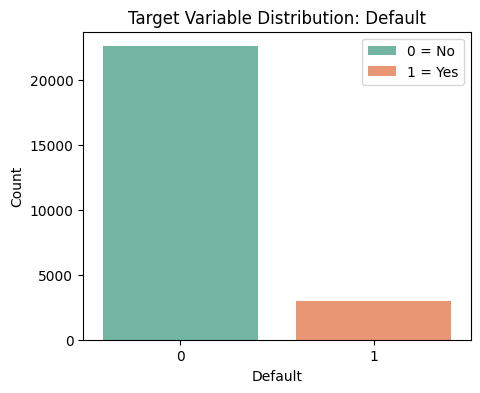

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,4))
sns.countplot(x='Default', data=df, hue= "Default", palette='Set2')
plt.title('Target Variable Distribution: Default')
plt.ylabel('Count')
plt.legend(labels=['0 = No', '1 = Yes']) 
plt.show()



- The target variable shows a **highly imbalanced** distribution.  
- This is important because **imbalanced target classes** can bias models toward the majority class. We will have to perform oversampling in order to increase the representation of the minority class before training a model.

At this stage, no transformation is applied yet, as the goal is to understand the target before data cleaning and modeling.

---

# Push files to Repo

In [20]:
import os

file_path = f'outputs/datasets/collection'
variable_to_save = df
filename = "LoanDefaultData.csv"

# Try to generate output folder
try:
    os.makedirs(name=file_path)
except Exception as e:
    print(e)

# Save the dataset as csv file for further use
variable_to_save.to_csv(f"{file_path}/{filename}", index=False)


[WinError 183] Cannot create a file when that file already exists: 'outputs/datasets/collection'


---

# Conclusions and Next Steps

The dataset appears complete and well-structured. Numerical variables are correctly typed, and categorical variables are stored as objects. Summary statistics show reasonable distributions, and the target variable ``Default`` is slightly imbalanced but usable. The ``LoanID`` column is unique for each record and does not contribute predictive value, so it will be removed in the data cleaning step. No missing or duplicate values were detected in the dataset.

Next Steps:
* Conduct exploratory data analysis (EDA): visualize univariate distributions and relationships between features and the target variable, to answer Business Reuqirement 1